# Validation that $P(\Delta u_{ij})$ is a Gaussian for two harmonic wells of the same width

### Claim

Consider two 1-D potentials defining two thermodynamic ensembles:

* $u_1(x) = \beta U_1(x) = \frac{1}{2}k(x - x_1)^2$
* $u_2(x) = \beta U_2(x) = \frac{1}{2}k(x - x_2)^2$

where $\beta = 1/kT$, and $x_2 > x_1$.   Consider a Boltzmann-distributed ensemble of $x$ values at equilibrium in ensemble 1.  We are interested in the distribution of values $\Delta u_{12} = u_2(x) - u_1(x)$, i.e. the distribution of the change in the (reduced) energies upon switching from ensemble 1 to ensemble 2.  I claim this distribution is:

$P(\Delta u_{12}) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp( \frac{-(\Delta u_{12} - \Delta u_0)^2}{2\sigma^2} )$

where
* $\sigma^2 = k \Delta x^2$
* $\Delta u_0 = k[ \frac{\Delta x^2}{2} + 2x_1\Delta x ) ] $

for $\Delta x = x_2 - x_1$.

**This means that if you empirically observe a $P(\Delta u_{ij})$ with variance $\sigma^2$, you can *model* it as two harmonic wells of the same width, spaced $\Delta x = k^{-1/2}\sigma$ apart.**

You can see my hasty pencil-and-paper derivation of this in a PDF [math-4-22-2021.pdf](math-4-22-2021.pdf)

### Validation

Is this claim *True*?  (It would be foolhardy to trust my analytical derivation, for I am very error prone.)  Let's numerically compute several distributions and see if this answer is correct.

As before, we'll define a number of potentials:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


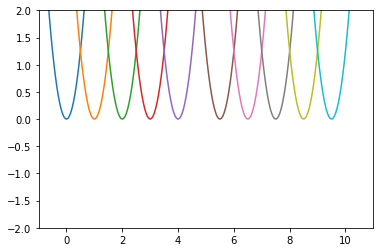

In [23]:
# let's define a number of harmonic potentials
#
#     u_i(x) = 1/2 * k_i (x - x_i)^2 + c
#
# each with a different equilibrium position x_i and force constant k_i

import numpy as np

def u_i(x, k, x0, c):
    """Returns the (reduced) energy of the harmonic potential in units kT."""
    return 0.5*k*(x-x0)**2 + c

def delta_f_harmonic(k_i, k_j, dims=1):
    """Returns the difference in free energy f_ij = f_j - f_i (in units kT) of two harmonic potentials
    with force constants k_i and k_j.  For  $n$-dimensional harmonic potentials,

    -\ln (Z_j/Z_i) = - (n/2) * \ln [ (k_i/k_j) ]"""
    
    return -1.0*(float(dims)/2.0) * np.log( k_i/k_j )
    

#x_i = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])   # length (unitless)
xshift = 0.5
x_i = np.array([0., 1., 2., 3., 4.,  5.+xshift, 6.+xshift, 7.+xshift, 8.+xshift, 9.+xshift])   # length (unitless)

ka, kb = 10.0, 500.0 
#k_i = np.array([ka, ka, ka, ka, ka, kb, ka, ka, ka, ka, ka])  # kT/(length)^2
k_i = np.array([ka, ka, ka, ka, ka,      ka, ka, ka, ka, ka])  # kT/(length)^2


#c_i = np.array([0.0, 0.0, 0.0, 0.0, 0.0, delta_f_harmonic(kb, ka), 0.0, 0.0, 0.0, 0.0, 0.0])  # kT/(length)^2
c_i = np.array([0.0, 0.0, 0.0, 0.0, 0.0,              0.0, 0.0, 0.0, 0.0, 0.0])  # kT/(length)^2
print(c_i)
n_ensembles = len(x_i)


# Let's make a plot of these

from matplotlib import pyplot as plt

plt.figure()
xvalues = np.arange(-2., 11., 0.05)
for i in range(n_ensembles):
    plt.plot(xvalues, u_i(xvalues, k_i[i], x_i[i], c_i[i]), label='i=%d'%i)
plt.xlim(-1,11)
plt.ylim(-2,2)
#plt.legend(loc='best')
plt.show()

We will perform MC sampling in ensemble $i=0$, and record the values of $\Delta u_{ij}$ where $j = 0,1, 2,3,....N-1$.

In [24]:
# create empty lists for all the ensembles j
Delta_u0j_values = [[] for j in range(n_ensembles)]

# random walk parameters
x = 0.0   # initial position
dx = 1.0 # gaussian step size 
i = 0  # thermo index


# trajectory storage
traj_every = 1  # write frequency
x_traj = []
step_traj = []


nsteps = 100000      # number of steps to MC sample 
print_every = 10000   # status output

for step in range(nsteps):
    
    energy = u_i(x, k_i[i], x_i[i], c_i[i])
    for j in range(n_ensembles):      
        energy_j = u_i(x, k_i[j], x_i[j], c_i[j])        
        Delta_u0j_values[j].append(energy_j - energy)
            
    # propose a MC move
    x_new = x + dx*np.random.randn()
    energy_new = u_i(x_new, k_i[i], x_i[i], c_i[i])
    
    # and accept it according to the metropolis criterion
    accept = False
    P_accept = min(1., np.exp(-(energy_new - energy)))
    if np.random.rand() < P_accept:
        accept = True
    
    if accept:
        x = x_new
        energy = energy_new
    
    # print a status report
    if step%print_every == 0:
        print('step', step, 'x', x)

    # store sample in trajectory 
    if step%traj_every == 0:
        x_traj.append(x)
        step_traj.append(step)

Delta_u0j_values = np.array( Delta_u0j_values )
print('Delta_u0j_values', Delta_u0j_values)
        

step 0 x 0.0
step 10000 x -0.44567574467836285
step 20000 x 0.04718797499710899
step 30000 x 0.31456053747485757
step 40000 x -0.04945395628278579
step 50000 x 0.02453520578508911
step 60000 x -0.6623145231943381
step 70000 x -0.20706994029518672
step 80000 x 0.15916197795396736
step 90000 x 0.06317333810780512
Delta_u0j_values [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  5.           5.           5.         ...   4.04388725   4.04388725
    4.04388725]
 [ 20.          20.          20.         ...  18.0877745   18.0877745
   18.0877745 ]
 ...
 [281.25       281.25       281.25       ... 274.07915436 274.07915436
  274.07915436]
 [361.25       361.25       361.25       ... 353.12304161 353.12304161
  353.12304161]
 [451.25       451.25       451.25       ... 442.16692886 442.16692886
  442.16692886]]


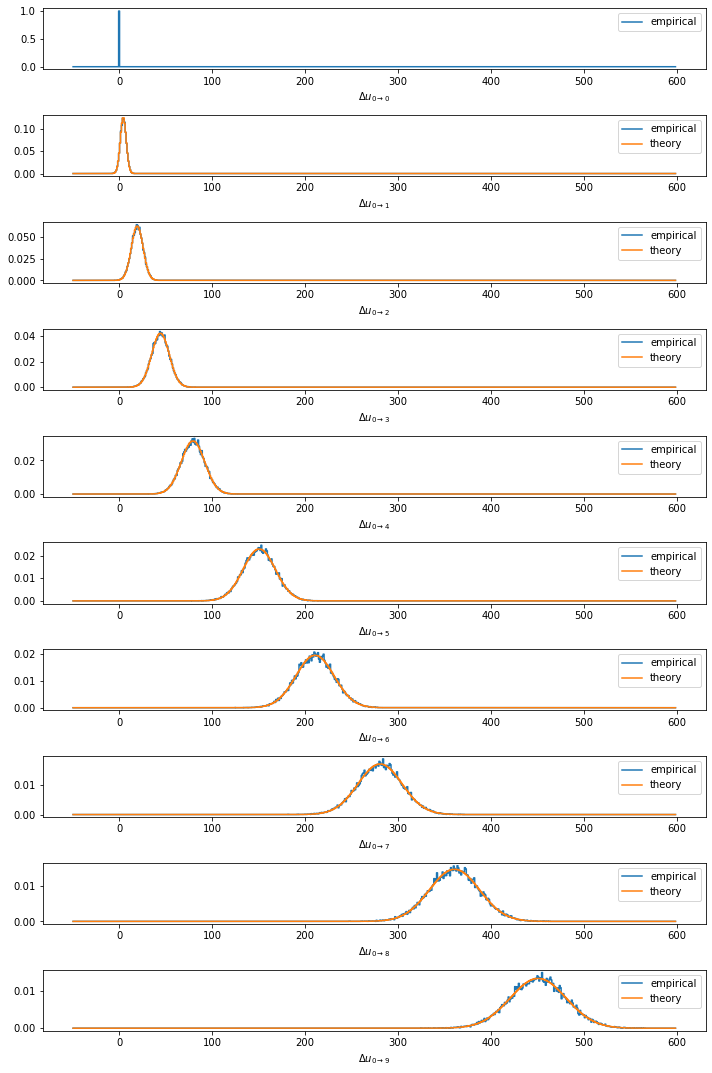

In [25]:
plt.figure(figsize=(10,15))
for j in range(n_ensembles):
    
    
    delta_u_bins = np.arange(-50., 600., 1.)
    counts, bin_edges = np.histogram(Delta_u0j_values[j,:], bins=delta_u_bins)
    counts = counts/counts.sum()  # normalize
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    
    plt.subplot(n_ensembles, 1, j+1)
    plt.step(bin_centers, counts, label='empirical')
    
    # Theory
    if j > 0:
        Delta_x = x_i[j] - x_i[0]
        sigma = k_i[0]**0.5 * Delta_x
        Del_u0 = k_i[0]*( (Delta_x**2)/2.0 + 2*x_i[0]*Delta_x )
        PDel_u = (2.0*np.pi*sigma**2)**(-0.5) * np.exp( -1.0*(bin_centers - Del_u0)**2/(2.0*sigma**2))
        plt.step(bin_centers, PDel_u, label='theory')
        
    plt.xlabel('$\Delta u_{0 \\rightarrow %d}$'%j)
    plt.legend(loc='best')
       
plt.tight_layout()
    